#Synthesis of RNA sequences similar to given noncoding-RNA families



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=1, filename=None)

In [3]:
from rnasynth.rna_synthesizer import RNASynthesizerInitializer
synthesizer = RNASynthesizerInitializer(instance_score_threshold_in=0.1,
                                        instance_score_threshold_out=1.3,
                                        min_size_connected_component_sequence_constraint=3,
                                        importance_threshold_sequence_constraint=-0.9,
                                        min_size_connected_component_structure_constraint=3,
                                        importance_threshold_structure_constraint=-0.9,
                                        n_synthesized_seqs_per_seed_seq=2,
                                        vectorizer_complexity=3,
                                        max_num=5,
                                        negative_shuffle_ratio=5
                                       ).synthesizer

In [4]:
from evaluation.performance_evaluation import learning_curve

In [5]:
params = {'rfam_id':'RF00005', 'number_of_samples':50,'n_experiment_repetitions':3, 'train_to_test_split_ratio':0.2,
          'shuffle_order':2, 'negative_shuffle_ratio':2, 'vectorizer_complexity':2, 'data_fraction_lower_bound':0.1,
          'data_fraction_upper_bound':0.5, 'data_fraction_chunks':5}     

In [6]:
roc_t, roc_s, apr_t, apr_s, data_fractions = learning_curve(params, synthesizer=synthesizer)

[0.10000000000000001, 0.20000000000000001, 0.30000000000000004, 0.40000000000000002, 0.5]
Starting RNA Synthesis experiment for RF00005 ...
Experiment cunducted with 50 sample sequences
Starting new HTTP connection (1): rfam.xfam.org
Training on data chunk 0/5 (data fraction: 0.1)
--------------------------------------------------------------------------------
run 1/3
Fit estimator on original data and evaluate the estimator.
Test set
Instances: 12 ; Features: 1048577 with an avg of 565 features per instance
--------------------------------------------------------------------------------
Test Estimate
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00         8
          1       0.33      1.00      0.50         4

avg / total       0.11      0.33      0.17        12

APR: 0.649
ROC: 0.688


/home/kohvaeip/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fit estimator on original + sampled data and evaluate the estimator.
Test set
Instances: 12 ; Features: 1048577 with an avg of 560 features per instance
--------------------------------------------------------------------------------
Test Estimate
             precision    recall  f1-score   support

         -1       0.67      1.00      0.80         8
          1       0.00      0.00      0.00         4

avg / total       0.44      0.67      0.53        12

APR: 0.611
ROC: 0.719
--------------------------------------------------------------------------------
run 2/3
Fit estimator on original data and evaluate the estimator.
Test set
Instances: 12 ; Features: 1048577 with an avg of 562 features per instance
--------------------------------------------------------------------------------
Test Estimate
             precision    recall  f1-score   support

         -1       0.78      0.88      0.82         8
          1       0.67      0.50      0.57         4

avg / total       0.74     

---

In [7]:
from evaluation.draw_utils import draw_learning_curve

delta = 0.005
scaling = 50

/home/kohvaeip/.local/lib/python2.7/site-packages/scipy/optimize/minpack.py:601: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


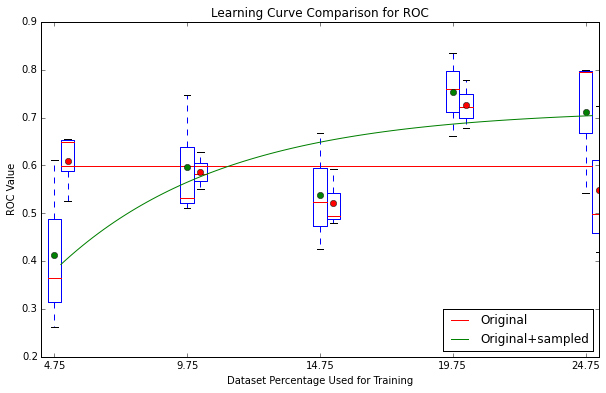

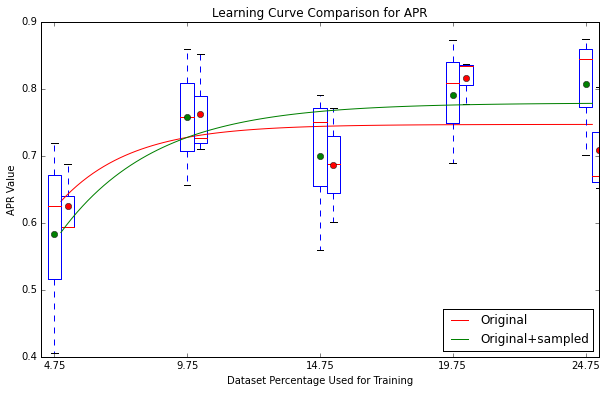

In [8]:
draw_learning_curve(data_a=roc_t, data_b=roc_s, x=data_fractions, measure='ROC', delta=delta, scaling=scaling)
draw_learning_curve(data_a=apr_t, data_b=apr_s, x=data_fractions, measure='APR', delta=delta, scaling=scaling)